<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install kaggle

In [2]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 11, in <module>
    load_entry_point('kaggle==1.5.3', 'console_scripts', 'kaggle')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2793, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2411, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2417, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 116, in authenticate
    self.config_file, self.config_d

In [0]:
!echo "{\"username\":\"dutianze\",\"key\":\"ff2944c6219d449b37460827c4414422\"}" > /root/.kaggle/kaggle.json

In [4]:
!more /root/.kaggle/kaggle.json

{"username":"dutianze","key":"ff2944c6219d449b37460827c4414422"}


In [5]:
!kaggle competitions download diabetic-retinopathy-detection

  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 56.6MB/s]
  0% 0.00/81.6k [00:00<?, ?B/s]
100% 81.6k/81.6k [00:00<00:00, 69.5MB/s]
 48% 5.00M/10.4M [00:00<00:00, 15.8MB/s]
100% 10.4M/10.4M [00:00<00:00, 26.3MB/s]
100% 7.81G/7.81G [02:34<00:00, 54.5MB/s]
100% 7.81G/7.81G [02:34<00:00, 54.3MB/s]
100% 7.81G/7.81G [02:35<00:00, 48.4MB/s]
100% 7.81G/7.81G [02:35<00:00, 53.9MB/s]
100% 7.81G/7.81G [02:43<00:00, 45.0MB/s]
100% 7.81G/7.81G [02:43<00:00, 51.4MB/s]
 99% 1.33G/1.34G [00:25<00:00, 45.5MB/s]
100% 1.34G/1.34G [00:25<00:00, 56.0MB/s]
100% 7.81G/7.81G [02:41<00:00, 53.5MB/s]
100% 7.81G/7.81G [02:41<00:00, 52.0MB/s]
100% 7.81G/7.81G [02:34<00:00, 50.4MB/s]
100% 7.81G/7.81G [02:34<00:00, 54.4MB/s]
100% 7.81G/7.81G [02:36<00:00, 64.4MB/s]
100% 7.81G/7.81G [02:37<00:00, 53.4MB/s]
100% 7.80G/7.81G [02:39<00:00, 52.5MB/s]
100% 7.81G/7.81G [02:39<00:00, 52.7MB/s]
100% 7.80G/7.81G [02:30<00:00, 38.0MB/s]
100% 7.81G/7.81G [02:30<00:00, 55.6MB/s]
100% 7.80G/7.81G [02:33<00:00, 28.

In [6]:
!apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [0]:
!cat train.zip* > train.zip

In [0]:
!cat test.zip* > test.zip

In [0]:
!rm train.zip.0*
!rm test.zip.0*

In [0]:
!rm -rf train

In [0]:
!unzip train.zip

In [14]:
!unzip trainLabels.csv.zip

Archive:  trainLabels.csv.zip
  inflating: trainLabels.csv         


In [50]:
!ls -l ./train |grep "^-"|wc -l

35126


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

In [52]:
base_image_dir = os.path.join('./train')
retina_df = pd.read_csv(os.path.join('./trainLabels.csv'))
retina_df['PatientId'] = retina_df['image'].map(lambda x: x.split('_')[0])
retina_df['path'] = retina_df['image'].map(lambda x: os.path.join(base_image_dir,
                                                         '{}.jpeg'.format(x)))
retina_df['exists'] = retina_df['path'].map(os.path.exists)
print(retina_df['exists'].sum(), 'images found of', retina_df.shape[0], 'total')
retina_df['eye'] = retina_df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)

retina_df.dropna(inplace = True)
retina_df = retina_df[retina_df['exists']]
retina_df.sample(3)

35126 images found of 35126 total


,image,level,PatientId,path,exists,eye
25815,32668_right,2,32668,./train/32668_right.jpeg,True,0
8873,11147_right,3,11147,./train/11147_right.jpeg,True,0
12962,16294_left,2,16294,./train/16294_left.jpeg,True,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe77fce59b0>,
      dtype=object)

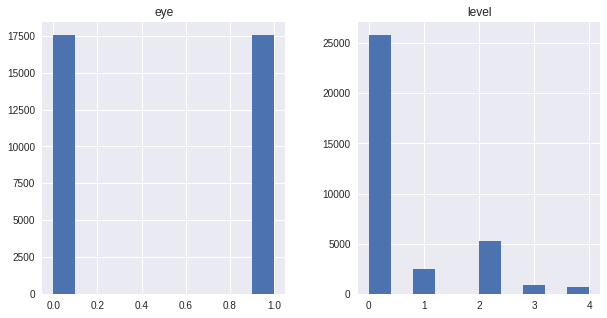

In [53]:
retina_df[['level', 'eye']].hist(figsize = (10, 5))

In [0]:
retina_df['level'] = retina_df['level'].map(lambda x: str(x))

In [0]:
retina_df['new_path'] = retina_df['path'].str.cat(retina_df['level'], sep='/')

In [58]:
retina_df.sample(3)

,image,level,PatientId,path,exists,eye,new_path
13819,17340_right,0,17340,./train/17340_right.jpeg,True,0,./train/17340_right.jpeg/0
5366,6745_left,0,6745,./train/6745_left.jpeg,True,1,./train/6745_left.jpeg/0
26545,33611_right,0,33611,./train/33611_right.jpeg,True,0,./train/33611_right.jpeg/0


In [0]:
retina_df['new_path'] = retina_df['new_path'].map(lambda x:
    x.split('/')[0] + '/' + x.split('/')[1] + '/'+ x.split('/')[3] + '_'+ x.split('/')[2]
)

In [60]:
retina_df.sample(3)

,image,level,PatientId,path,exists,eye,new_path
24441,30898_right,0,30898,./train/30898_right.jpeg,True,0,./train/0_30898_right.jpeg
14593,18301_right,0,18301,./train/18301_right.jpeg,True,0,./train/0_18301_right.jpeg
34615,43749_right,0,43749,./train/43749_right.jpeg,True,0,./train/0_43749_right.jpeg


In [0]:
retina_df['rename'] = retina_df['path'].str.cat(retina_df['new_path'], sep='#')

In [62]:
retina_df.sample(3)

,image,level,PatientId,path,exists,eye,new_path,rename
27594,34931_left,0,34931,./train/34931_left.jpeg,True,1,./train/0_34931_left.jpeg,./train/34931_left.jpeg#./train/0_34931_left.jpeg
23636,29863_left,0,29863,./train/29863_left.jpeg,True,1,./train/0_29863_left.jpeg,./train/29863_left.jpeg#./train/0_29863_left.jpeg
27871,35301_right,2,35301,./train/35301_right.jpeg,True,0,./train/2_35301_right.jpeg,./train/35301_right.jpeg#./train/2_35301_right...


In [0]:
retina_df['rename'].map(lambda x: os.rename(x.split('#')[0], x.split('#')[1]))

In [64]:
ls -l ./train | head -n 5

total 37125168
-rw-r--r-- 1 root root 1563069 Feb  8  2015 0_10003_left.jpeg
-rw-r--r-- 1 root root 1583826 Feb  8  2015 0_10003_right.jpeg
-rw-r--r-- 1 root root  823276 Feb  8  2015 0_10007_left.jpeg
-rw-r--r-- 1 root root  862711 Feb  8  2015 0_10007_right.jpeg


In [0]:
!mkdir data
!mkdir ./data/0
!mkdir ./data/1
!mkdir ./data/2
!mkdir ./data/3
!mkdir ./data/4

In [0]:
import os, shutil

In [0]:
for fname in os.listdir(r'./train'):
  if(fname.startswith('0')):
    src = os.path.join('./train', fname) 
    dst = os.path.join('./data/0', fname)
  elif(fname.startswith('1')):
    src = os.path.join('./train', fname) 
    dst = os.path.join('./data/1', fname)
  elif(fname.startswith('2')):
    src = os.path.join('./train', fname) 
    dst = os.path.join('./data/2', fname)
  elif(fname.startswith('3')):
    src = os.path.join('./train', fname) 
    dst = os.path.join('./data/3', fname)
  elif(fname.startswith('4')):
    src = os.path.join('./train', fname) 
    dst = os.path.join('./data/4', fname)
  shutil.copyfile(src, dst)
  print(fname)

In [104]:
ls -l ./data_708/3 |grep "^-"|wc -l

708


In [0]:
!mkdir data_708
!mkdir ./data_708/0
!mkdir ./data_708/1
!mkdir ./data_708/2
!mkdir ./data_708/3
!mkdir ./data_708/4

In [0]:
index = 0
for fname in os.listdir(r'./data/4'):
  if index==708:
    break
  src = os.path.join('./data/4', fname) 
  dst = os.path.join('./data_708/4', fname)
  shutil.copyfile(src, dst)
  index = index+1
  print(fname)

=================

In [0]:
!zip -r data_708.zip data_708

In [110]:
!mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [0]:
!mv data_708.zip ./kaggle

In [114]:
!ls -l ./kaggle

total 3519208
-rw-r--r-- 1 root root 3603662179 Mar 24 06:23 data_708.zip


In [115]:
!kaggle datasets init -p ./kaggle

Data package template written to: ./kaggle/dataset-metadata.json


In [117]:
!ls ./kaggle

data_708.zip  dataset-metadata.json


In [0]:
!echo "{\"licenses\": [{\"name\": \"CC0-1.0\"}], \"id\": \"dutianze/diabetic_708\", \"title\": \"mydata\"}" > ./kaggle/dataset-metadata.json

In [124]:
!more ./kaggle/dataset-metadata.json

{"licenses": [{"name": "CC0-1.0"}], "id": "dutianze/diabetic_708", "title": "myd
ata"}


In [125]:
!kaggle datasets create -p ./kaggle/

Starting upload for file data_708.zip
100% 3.36G/3.36G [01:10<00:00, 51.0MB/s]
Upload successful: data_708.zip (3GB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/dutianze/diabetic_708


In [0]:
!mkdir data_bin
!mkdir ./data_bin/0
!mkdir ./data_bin/1
!mkdir ./data_bin/2
!mkdir ./data_bin/3
!mkdir ./data_bin/4

In [0]:
index = 0
for fname in os.listdir(r'./data/0'):
  if index==2832:
    break
  src = os.path.join('./data/0', fname) 
  dst = os.path.join('./data_bin/0', fname)
  shutil.copyfile(src, dst)
  index = index+1
  print(fname)

In [137]:
ls -l ./data_bin/4 |grep "^-"|wc -l

708


In [142]:
ls -l ./data_bin/4 | head -n 5

total 786140
-rw-r--r-- 1 root root 1212278 Mar 24 06:35 4_10017_left.jpeg
-rw-r--r-- 1 root root 1208863 Mar 24 06:35 4_10017_right.jpeg
-rw-r--r-- 1 root root 1377738 Mar 24 06:35 4_10047_right.jpeg
-rw-r--r-- 1 root root 1566055 Mar 24 06:35 4_10193_right.jpeg


In [0]:
mkdir kaggle2

In [0]:
!zip -r data_bin.zip data_bin

In [0]:
!mv data_bin.zip ./kaggle2

In [146]:
!kaggle datasets init -p ./kaggle2

Data package template written to: ./kaggle2/dataset-metadata.json


In [0]:
!echo "{\"licenses\": [{\"name\": \"CC0-1.0\"}], \"id\": \"dutianze/diabetic_bin\", \"title\": \"mydata_bin\"}" > ./kaggle2/dataset-metadata.json

In [148]:
!kaggle datasets create -p ./kaggle2/

Starting upload for file data_bin.zip
100% 5.31G/5.31G [01:29<00:00, 63.5MB/s]
Upload successful: data_bin.zip (5GB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/dutianze/diabetic_bin
